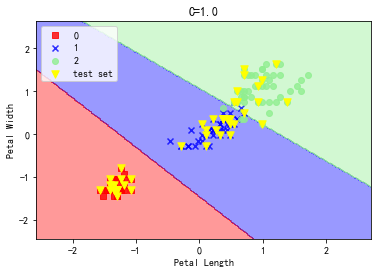

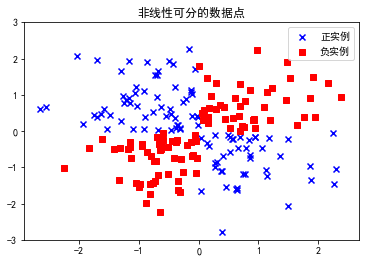

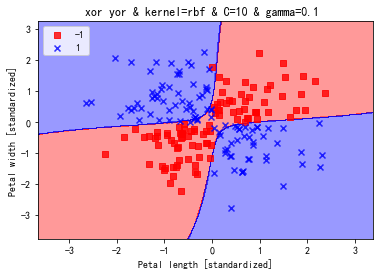

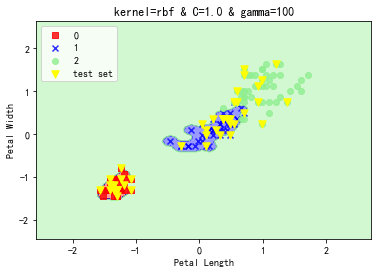

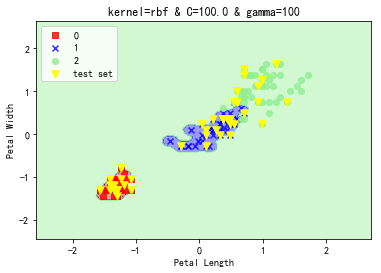

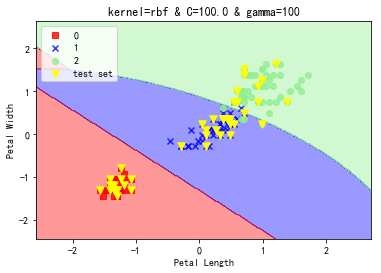

In [19]:
# -*- coding: utf-8 -*-
"""
创建时间 Wed Sep 12 10:18:06 2018
描述:svm 模型
作者:PM.liugang
review:18.9.17
"""

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

plt.rcParams['font.sans-serif'] = ['SimHei'] #输出中文
plt.rcParams['axes.unicode_minus'] = False#正负轴显示

def plot_decision_regions(X, 
                          y, 
                          classifier, 
                          test_idx=None, 
                          resolution=0.02):
    marker = list('sxo^v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, 
                 xx2, 
                 z, 
                 alpha=0.4, 
                 cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker=marker[idx],
                    label=cl)
    if test_idx:
        x_test = X[test_idx, :]
        plt.scatter(x_test[:, 0], 
                    x_test[:, 1], 
                    c='yellow', 
                    alpha=1.0,
                    linewidths=1, 
                    marker='v', 
                    s=55, 
                    label='test set')
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.legend(loc='upper left')
    # plt.show()


'''
构建支持向量机模型
不同参数 C gamma 对分类的影响
'''
# kernel = linear
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
sc = StandardScaler() # Z-Score标准化 [均值0,方差1]
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

y_combined = np.hstack((y_train, y_test))

X_combined = np.vstack((X_train, X_test)) # content = X ,series number is shuffled
X_combined_std = sc.transform(X_combined) # 

svm = SVC(kernel='linear',  # 线性
          C=1.0,  # 松弛变量
          random_state=0)
svm.fit(X_combined_std, y_combined) # 训练模型用的标准化后的数据
plot_decision_regions(X_combined_std, # 标签不用标准化
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('C=1.0')
plt.legend(loc='upper left')
plt.show()

x = np.arange(5)
np.logical_xor(x < 1, x > 3)
# logical_xor -> TFFFF FFFFT the same is F,not the same is T
# dataset
np.random.seed(0)
xor = np.random.randn(200, 2)  # xor.shape = 200,2
yor = np.logical_xor(xor[:, 0] > 0,
                     xor[:, 1] > 0)  # the same is F,is not the same is T
# index 
yor = np.where(yor, 1, -1)  # {-1,1}

plt.scatter(xor[yor == 1, 0], # 索引[yor==1,0]
            xor[yor == 1, 1], 
            c='b', 
            marker='x', 
            label='正实例')

plt.scatter(xor[yor == -1, 0], 
            xor[yor == -1, 1], 
            c='r', 
            marker='s', 
            label='负实例')
plt.ylim(-3.0, 3.0)  # if plt.ylim(-3.0): 只限制起点-3.0
plt.title('非线性可分的数据点')
plt.legend(loc='best')
plt.show()

'''支持向量机'''
svm = SVC(kernel='rbf',
          random_state=0,
          gamma=0.10, # 惩罚边界
          C=10.0)
svm.fit(xor, yor)
plot_decision_regions(xor,
                      yor,
                      classifier=svm)
plt.title('xor yor & kernel=rbf & C=10 & gamma=0.1 ')
plt.legend(loc='upper left')
plt.show()

svm = SVC(kernel='rbf',
          random_state=0,
          gamma=100, 
          C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.title('kernel=rbf & C=1.0 & gamma=100')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()

svm = SVC(kernel='rbf',
          random_state=0,
          gamma=100, 
          C=100.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.title('kernel=rbf & C=100.0 & gamma=100')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()

svm = SVC(kernel='rbf',
          random_state=0,
          gamma=0.1, 
          C=100.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.title('kernel=rbf & C=100.0 & gamma=100')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()